In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

#### Table F-10. Presence of Children Under 18 Years Old--All Families by Median and Mean Income: 1974 to 2021					
Information on confidentiality protection, sampling error, nonsampling error, and definitions is available at <https://www2.census.gov/programs-surveys/cps/techdocs/cpsmar22.pdf>.					
Footnotes are available at <www.census.gov/topics/income-poverty/income/guidance/cps-historic-footnotes.html>.					
Source: U.S. Census Bureau, Current Population Survey, 1975 to 2022 Annual Social and Economic Supplements (CPS ASEC).					
(Families as of March of the following year. Related' children beginning in 1987, 'Own' children for earlier years. Income in current and 2021 R-CPI-U-RS adjusted dollars (28))					
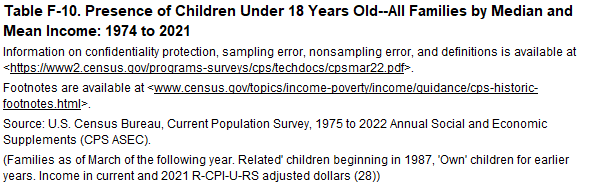

In [2]:
#read in all families only through 1974
f10a = pd.read_excel('../data/single_parent/census/historical_income_families/f10ar_mean_med_inc_type_fam_childund18.xlsx',
                     skiprows=8, nrows=51)
pd.set_option('display.max_rows', None)
f10a

,"Type of family, number of children, and year",Number (thousands),Median income,Unnamed: 3,Mean income,Unnamed: 5
0,NaN,NaN,Current dollars,2021 dollars,Current dollars,2021 dollars
1,2021,84283.0,88590,88590,121840,121840
2,2020 (41),83723.0,84348,88286,115310,120694
3,2019,83698.0,86011,91151,116735,123711
4,2018,83508.0,78646,84856,106045,114418
5,2017 (40),83539.0,76135,84149,103218,114083
6,2017,83103.0,75938,83931,100400,110968
7,2016,82854.0,72707,82089,97357,109919
8,2015,82199.0,70697,80849,92673,105980
9,2014,81730.0,66632,76331,88765,101686


In [3]:
#rename columns
f10a = f10a.rename(columns = {'Type of family, number of children, and year': 'year', 'Number (thousands)': 'all_families (thousands)', 
                            'Unnamed: 3': 'all_med_2021_dollars', 'Unnamed: 5': 'all_mean_2021_dollars'})

#drop empty columns or columns not needed
f10a  = f10a .drop(['Median income', 'Mean income'], axis=1)

#drop prior index rows, drop original rows and keep revised
f10a  = f10a .drop(labels=[0, 6, 11]).reset_index(drop=True)

#remove extra spaces in column headers
f10a  = f10a .rename(columns=lambda x: x.strip())

# remove extra spaces over all strings
f10a  = f10a .applymap(lambda x: x.strip() if isinstance(x, str) else x)

f10a.head(2)

,year,all_families (thousands),all_med_2021_dollars,all_mean_2021_dollars
0,2021,84283.0,88590,121840
1,2020 (41),83723.0,88286,120694


In [4]:
f10a = f10a.astype({'year': 'str', 'all_families (thousands)': 'int64'})
f10a.head(2)

,year,all_families (thousands),all_med_2021_dollars,all_mean_2021_dollars
0,2021,84283,88590,121840
1,2020 (41),83723,88286,120694


In [5]:
#read in all family types with one or more children under 18 yrs through 1974
f10child = pd.read_excel('../data/single_parent/census/historical_income_families/f10ar_mean_med_inc_type_fam_childund18.xlsx',
                    skiprows=114, nrows=51)
pd.set_option('display.max_rows', None)
f10child.head()

,"Type of family, number of children, and year",Number (thousands),Median income,Unnamed: 3,Mean income,Unnamed: 5
0,NaN,NaN,Current\ndollars,2021\ndollars,Current\ndollars,2021\ndollars
1,2021,37088.0,86832,86832,121123,121123
2,2020 (41),37058.0,81884,85708,116427,121863
3,2019,36878.0,83694,88696,116474,123434
4,2018,37480.0,76696,82752,103815,112012


In [6]:
#rename columns
f10child = f10child.rename(columns = {'Type of family, number of children, and year': 'year', 'Number (thousands)': 'families_one_or_more_children (thousands)', 
                                      'Unnamed: 3': 'child_med_2021_dollars', 'Unnamed: 5': 'child_mean_2021_dollars'})

#drop empty columns or columns not needed
f10child = f10child .drop(['Median income', 'Mean income'], axis=1)

#drop prior index rows, drop original rows and keep revised
f10child  = f10child.drop(labels=[0, 6, 11]).reset_index(drop=True)

#remove extra spaces in column headers
f10child  = f10child.rename(columns=lambda x: x.strip())

# remove extra spaces over all strings
f10child  = f10child.applymap(lambda x: x.strip() if isinstance(x, str) else x)

f10child.head(2)

,year,families_one_or_more_children (thousands),child_med_2021_dollars,child_mean_2021_dollars
0,2021,37088.0,86832,121123
1,2020 (41),37058.0,85708,121863


In [7]:
# datatypes for merge
f10child = f10child.astype({'year': 'str', 'families_one_or_more_children (thousands)': 'int64'})
f10child.head(2)

,year,families_one_or_more_children (thousands),child_med_2021_dollars,child_mean_2021_dollars
0,2021,37088,86832,121123
1,2020 (41),37058,85708,121863


In [8]:
f10 = pd.merge(f10a, f10child, on = 'year', how = 'left')
f10.head(2)

,year,all_families (thousands),all_med_2021_dollars,all_mean_2021_dollars,families_one_or_more_children (thousands),child_med_2021_dollars,child_mean_2021_dollars
0,2021,84283,88590,121840,37088,86832,121123
1,2020 (41),83723,88286,120694,37058,85708,121863


In [9]:
#read in married couple families with at least 1 child under 18 through 1974
f10mc_child = pd.read_excel('../data/single_parent/census/historical_income_families/f10ar_mean_med_inc_type_fam_childund18.xlsx',
                    skiprows=274, nrows=51)
pd.set_option('display.max_rows', None)
f10mc_child

,"Type of family, number of children, and year",Number (thousands),Median income,Unnamed: 3,Mean income,Unnamed: 5
0,NaN,NaN,Current\ndollars,2021\ndollars,Current\ndollars,2021\ndollars
1,2021,24489.0,118077,118077,153380,153380
2,2020 (41),24451.0,111247,116441,147719,154617
3,2019,24961.0,111281,117932,145887,154606
4,2018,25128.0,101285,109283,130093,140365
5,2017 (40),25425.0,98045,108366,127072,140448
6,2017,25229.0,97622,107898,124897,138044
7,2016,25098.0,93754,105851,120017,135503
8,2015,25117.0,91097,104178,115349,131912
9,2014,25539.0,87420,100145,111278,127476


In [10]:
#rename columns
f10mc_child = f10mc_child.rename(columns = {'Type of family, number of children, and year': 'year', 'Number (thousands)': 'married_child (thousands)', 
                            'Unnamed: 3': 'mc_med_2021_dollars', 'Unnamed: 5': 'mc_mean_2021_dollars'})

#drop empty columns or columns not needed
f10mc_child = f10mc_child.drop(['Median income', 'Mean income'], axis=1)

#drop prior index rows, drop original rows and keep revised
f10mc_child = f10mc_child.drop(labels=[0, 6, 11]).reset_index(drop=True)

#remove extra spaces in column headers
f10mc_child = f10mc_child.rename(columns=lambda x: x.strip())

# remove extra spaces over all strings
f10mc_child = f10mc_child.applymap(lambda x: x.strip() if isinstance(x, str) else x)

f10mc_child.head(2)

,year,married_child (thousands),mc_med_2021_dollars,mc_mean_2021_dollars
0,2021,24489.0,118077,153380
1,2020 (41),24451.0,116441,154617


In [11]:
f10mc_child = f10mc_child.astype({'year': 'str', 'married_child (thousands)': 'int64'})
f10mc_child

,year,married_child (thousands),mc_med_2021_dollars,mc_mean_2021_dollars
0,2021,24489,118077,153380
1,2020 (41),24451,116441,154617
2,2019,24961,117932,154606
3,2018,25128,109283,140365
4,2017 (40),25425,108366,140448
5,2016,25098,105851,135503
6,2015,25117,104178,131912
7,2014,25539,100145,127476
8,2013 (39),25810,99015,125412
9,2012,25269,96298,120277


In [12]:
f10 = pd.merge(f10, f10mc_child, on = 'year', how = 'left')
f10.head(2)

,year,all_families (thousands),all_med_2021_dollars,all_mean_2021_dollars,families_one_or_more_children (thousands),child_med_2021_dollars,child_mean_2021_dollars,married_child (thousands),mc_med_2021_dollars,mc_mean_2021_dollars
0,2021,84283,88590,121840,37088,86832,121123,24489,118077,153380
1,2020 (41),83723,88286,120694,37058,85708,121863,24451,116441,154617


In [13]:
#read in female hh, no spouse present, with at least 1 child under 18, through 1974
f10fhh = pd.read_excel('../data/single_parent/census/historical_income_families/f10ar_mean_med_inc_type_fam_childund18.xlsx',
                    skiprows=434, nrows=51)
pd.set_option('display.max_rows', None)
f10fhh.head(2)

,"Type of family, number of children, and year",Number (thousands),Median income,Unnamed: 3,Mean income,Unnamed: 5
0,NaN,NaN,Current\ndollars,2021\ndollars,Current\ndollars,2021\ndollars
1,2021,9290.0,37228,37228,51837,51837


In [14]:
#rename columns
f10fhh = f10fhh.rename(columns = {'Type of family, number of children, and year': 'year', 'Number (thousands)': 'female_hh_no_spouse_child (thousands)', 
                            'Unnamed: 3': 'fhh_med_2021_dollars', 'Unnamed: 5': 'fhh_mean_2021_dollars'})

#drop empty columns or columns not needed
f10fhh = f10fhh.drop(['Median income', 'Mean income'], axis=1)

#drop prior index rows, drop original rows and keep revised
f10fhh = f10fhh.drop(labels=[0, 6, 11]).reset_index(drop=True)

#remove extra spaces in column headers
f10fhh = f10fhh.rename(columns=lambda x: x.strip())

# remove extra spaces over all strings
f10fhh = f10fhh.applymap(lambda x: x.strip() if isinstance(x, str) else x)

f10fhh

,year,female_hh_no_spouse_child (thousands),fhh_med_2021_dollars,fhh_mean_2021_dollars
0,2021,9290.0,37228,51837
1,2020 (41),9291.0,37832,52486
2,2019,8791.0,38216,52389
3,2018,9167.0,35563,49705
4,2017 (40),9503.0,34023,47136
5,2016,9789.0,34136,47670
6,2015,10099.0,32390,46310
7,2014,10174.0,30213,42134
8,2013 (39),10576.0,29589,41793
9,2012,10033.0,30138,41954


In [15]:
f10fhh = f10fhh.astype({'year': 'str', 'female_hh_no_spouse_child (thousands)': 'int64'})
f10fhh.head(2)

,year,female_hh_no_spouse_child (thousands),fhh_med_2021_dollars,fhh_mean_2021_dollars
0,2021,9290,37228,51837
1,2020 (41),9291,37832,52486


In [16]:
f10 = pd.merge(f10, f10fhh, on = 'year', how = 'left')
f10.head(3)

,year,all_families (thousands),all_med_2021_dollars,all_mean_2021_dollars,families_one_or_more_children (thousands),child_med_2021_dollars,child_mean_2021_dollars,married_child (thousands),mc_med_2021_dollars,mc_mean_2021_dollars,female_hh_no_spouse_child (thousands),fhh_med_2021_dollars,fhh_mean_2021_dollars
0,2021,84283,88590,121840,37088,86832,121123,24489,118077,153380,9290,37228,51837
1,2020 (41),83723,88286,120694,37058,85708,121863,24451,116441,154617,9291,37832,52486
2,2019,83698,91151,123711,36878,88696,123434,24961,117932,154606,8791,38216,52389


In [17]:
#read in male hh, no spouse present, with at least 1 child under 18, through 1974
f10mhh = pd.read_excel('../data/single_parent/census/historical_income_families/f10ar_mean_med_inc_type_fam_childund18.xlsx',
                    skiprows=594, nrows=51)
pd.set_option('display.max_rows', None)
f10mhh

,"Type of family, number of children, and year",Number (thousands),Median income,Unnamed: 3,Mean income,Unnamed: 5
0,NaN,NaN,Current\ndollars,2021\ndollars,Current\ndollars,2021\ndollars
1,2021,3308,56017,56017,76901,76901
2,2020 (41),3316,52482,54933,71411,74745
3,2019,3126,52676,55824,70135,74326
4,2018,3185,48259,52070,62698,67649
5,2017 (40),3131,46494,51388,62348,68911
6,2017,3165,47275,52251,64069,70813
7,2016,3095,45462,51328,62969,71094
8,2015,3105,41466,47420,59997,68612
9,2014,3024,41436,47468,56856,65132


In [18]:
#rename columns
f10mhh = f10mhh.rename(columns = {'Type of family, number of children, and year': 'year', 'Number (thousands)': 'male_hh_no_spouse_child (thousands)', 
                            'Unnamed: 3': 'mhh_med_2021_dollars', 'Unnamed: 5': 'mhh_mean_2021_dollars'})

#drop empty columns or columns not needed
f10mhh = f10mhh.drop(['Median income', 'Mean income'], axis=1)

#drop prior index rows, drop original rows and keep revised
f10mhh = f10mhh.drop(labels=[0, 6, 11]).reset_index(drop=True)

#remove extra spaces in column headers
f10mhh = f10mhh.rename(columns=lambda x: x.strip())

# remove extra spaces over all strings
f10mhh = f10mhh.applymap(lambda x: x.strip() if isinstance(x, str) else x)

f10mhh

,year,male_hh_no_spouse_child (thousands),mhh_med_2021_dollars,mhh_mean_2021_dollars
0,2021,3308,56017,76901
1,2020 (41),3316,54933,74745
2,2019,3126,55824,74326
3,2018,3185,52070,67649
4,2017 (40),3131,51388,68911
5,2016,3095,51328,71094
6,2015,3105,47420,68612
7,2014,3024,47468,65132
8,2013 (39),3293,47978,66543
9,2012,3169,43117,59391


In [19]:
f10mhh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   year                                 48 non-null     object
 1   male_hh_no_spouse_child (thousands)  48 non-null     object
 2   mhh_med_2021_dollars                 48 non-null     object
 3   mhh_mean_2021_dollars                48 non-null     object
dtypes: object(4)
memory usage: 1.6+ KB


In [20]:
f10mhh = f10mhh.astype({'year': 'str'})

In [21]:
f10 = pd.merge(f10, f10mhh, on = 'year', how = 'left')
f10.head(3)

,year,all_families (thousands),all_med_2021_dollars,all_mean_2021_dollars,families_one_or_more_children (thousands),child_med_2021_dollars,child_mean_2021_dollars,married_child (thousands),mc_med_2021_dollars,mc_mean_2021_dollars,female_hh_no_spouse_child (thousands),fhh_med_2021_dollars,fhh_mean_2021_dollars,male_hh_no_spouse_child (thousands),mhh_med_2021_dollars,mhh_mean_2021_dollars
0,2021,84283,88590,121840,37088,86832,121123,24489,118077,153380,9290,37228,51837,3308,56017,76901
1,2020 (41),83723,88286,120694,37058,85708,121863,24451,116441,154617,9291,37832,52486,3316,54933,74745
2,2019,83698,91151,123711,36878,88696,123434,24961,117932,154606,8791,38216,52389,3126,55824,74326


In [22]:
#locate additional letters in year column
f10= f10[f10['year'].str.match('\d{4}[a-zA-Z]?', na=False)]
#extract only the year
f10['year'] = f10['year'].str.extract('(\d{4})', expand=False).astype(int)
#sort by descending
f10 = f10.sort_values('year', ascending=False)

f10

,year,all_families (thousands),all_med_2021_dollars,all_mean_2021_dollars,families_one_or_more_children (thousands),child_med_2021_dollars,child_mean_2021_dollars,married_child (thousands),mc_med_2021_dollars,mc_mean_2021_dollars,female_hh_no_spouse_child (thousands),fhh_med_2021_dollars,fhh_mean_2021_dollars,male_hh_no_spouse_child (thousands),mhh_med_2021_dollars,mhh_mean_2021_dollars
0,2021,84283,88590,121840,37088,86832,121123,24489,118077,153380,9290,37228,51837,3308,56017,76901
1,2020,83723,88286,120694,37058,85708,121863,24451,116441,154617,9291,37832,52486,3316,54933,74745
2,2019,83698,91151,123711,36878,88696,123434,24961,117932,154606,8791,38216,52389,3126,55824,74326
3,2018,83508,84856,114418,37480,82752,112012,25128,109283,140365,9167,35563,49705,3185,52070,67649
4,2017,83539,84149,114083,38059,80852,111262,25425,108366,140448,9503,34023,47136,3131,51388,68911
5,2016,82854,82089,109919,37982,78884,107617,25098,105851,135503,9789,34136,47670,3095,51328,71094
6,2015,82199,80849,105980,38321,76114,104224,25117,104178,131912,10099,32390,46310,3105,47420,68612
7,2014,81730,76331,101686,38736,73049,100196,25539,100145,127476,10174,30213,42134,3024,47468,65132
8,2013,82316,76271,102134,39678,71789,98239,25810,99015,125412,10576,29589,41793,3293,47978,66543
9,2012,80944,73583,97939,38471,70914,94836,25269,96298,120277,10033,30138,41954,3169,43117,59391


In [23]:
#read in median income
real_med = pd.read_csv('../data/single_parent/fred/real_median_hh_inc_1984-2021.csv')
pd.set_option('display.max_rows', None)
real_med.head(3)

,DATE,MEHOINUSA672N
0,2021,70784
1,2020,71186
2,2019,72808


In [24]:
#rename columns
real_med = real_med.rename(columns = {'DATE': 'year', 'MEHOINUSA672N': 'real_med_inc_fred'})
real_med.head(3)

,year,real_med_inc_fred
0,2021,70784
1,2020,71186
2,2019,72808


In [25]:
#drop rows prior to 1984
f10_1984 = f10[:-14]
f10_1984

,year,all_families (thousands),all_med_2021_dollars,all_mean_2021_dollars,families_one_or_more_children (thousands),child_med_2021_dollars,child_mean_2021_dollars,married_child (thousands),mc_med_2021_dollars,mc_mean_2021_dollars,female_hh_no_spouse_child (thousands),fhh_med_2021_dollars,fhh_mean_2021_dollars,male_hh_no_spouse_child (thousands),mhh_med_2021_dollars,mhh_mean_2021_dollars
0,2021,84283,88590,121840,37088,86832,121123,24489,118077,153380,9290,37228,51837,3308,56017,76901
1,2020,83723,88286,120694,37058,85708,121863,24451,116441,154617,9291,37832,52486,3316,54933,74745
2,2019,83698,91151,123711,36878,88696,123434,24961,117932,154606,8791,38216,52389,3126,55824,74326
3,2018,83508,84856,114418,37480,82752,112012,25128,109283,140365,9167,35563,49705,3185,52070,67649
4,2017,83539,84149,114083,38059,80852,111262,25425,108366,140448,9503,34023,47136,3131,51388,68911
5,2016,82854,82089,109919,37982,78884,107617,25098,105851,135503,9789,34136,47670,3095,51328,71094
6,2015,82199,80849,105980,38321,76114,104224,25117,104178,131912,10099,32390,46310,3105,47420,68612
7,2014,81730,76331,101686,38736,73049,100196,25539,100145,127476,10174,30213,42134,3024,47468,65132
8,2013,82316,76271,102134,39678,71789,98239,25810,99015,125412,10576,29589,41793,3293,47978,66543
9,2012,80944,73583,97939,38471,70914,94836,25269,96298,120277,10033,30138,41954,3169,43117,59391


In [26]:
f10_1984 = pd.merge(f10_1984, real_med, on = 'year', how = 'left')
f10_1984

,year,all_families (thousands),all_med_2021_dollars,all_mean_2021_dollars,families_one_or_more_children (thousands),child_med_2021_dollars,child_mean_2021_dollars,married_child (thousands),mc_med_2021_dollars,mc_mean_2021_dollars,female_hh_no_spouse_child (thousands),fhh_med_2021_dollars,fhh_mean_2021_dollars,male_hh_no_spouse_child (thousands),mhh_med_2021_dollars,mhh_mean_2021_dollars,real_med_inc_fred
0,2021,84283,88590,121840,37088,86832,121123,24489,118077,153380,9290,37228,51837,3308,56017,76901,70784
1,2020,83723,88286,120694,37058,85708,121863,24451,116441,154617,9291,37832,52486,3316,54933,74745,71186
2,2019,83698,91151,123711,36878,88696,123434,24961,117932,154606,8791,38216,52389,3126,55824,74326,72808
3,2018,83508,84856,114418,37480,82752,112012,25128,109283,140365,9167,35563,49705,3185,52070,67649,68168
4,2017,83539,84149,114083,38059,80852,111262,25425,108366,140448,9503,34023,47136,3131,51388,68911,67571
5,2016,82854,82089,109919,37982,78884,107617,25098,105851,135503,9789,34136,47670,3095,51328,71094,66657
6,2015,82199,80849,105980,38321,76114,104224,25117,104178,131912,10099,32390,46310,3105,47420,68612,64631
7,2014,81730,76331,101686,38736,73049,100196,25539,100145,127476,10174,30213,42134,3024,47468,65132,61468
8,2013,82316,76271,102134,39678,71789,98239,25810,99015,125412,10576,29589,41793,3293,47978,66543,62425
9,2012,80944,73583,97939,38471,70914,94836,25269,96298,120277,10033,30138,41954,3169,43117,59391,60313


In [27]:
# remove real_med from dataframe
col = f10_1984.pop('real_med_inc_fred')  
# insert real_med at index 1
f10_1984.insert(1, 'real_med_inc_fred', col)

f10_1984

,year,real_med_inc_fred,all_families (thousands),all_med_2021_dollars,all_mean_2021_dollars,families_one_or_more_children (thousands),child_med_2021_dollars,child_mean_2021_dollars,married_child (thousands),mc_med_2021_dollars,mc_mean_2021_dollars,female_hh_no_spouse_child (thousands),fhh_med_2021_dollars,fhh_mean_2021_dollars,male_hh_no_spouse_child (thousands),mhh_med_2021_dollars,mhh_mean_2021_dollars
0,2021,70784,84283,88590,121840,37088,86832,121123,24489,118077,153380,9290,37228,51837,3308,56017,76901
1,2020,71186,83723,88286,120694,37058,85708,121863,24451,116441,154617,9291,37832,52486,3316,54933,74745
2,2019,72808,83698,91151,123711,36878,88696,123434,24961,117932,154606,8791,38216,52389,3126,55824,74326
3,2018,68168,83508,84856,114418,37480,82752,112012,25128,109283,140365,9167,35563,49705,3185,52070,67649
4,2017,67571,83539,84149,114083,38059,80852,111262,25425,108366,140448,9503,34023,47136,3131,51388,68911
5,2016,66657,82854,82089,109919,37982,78884,107617,25098,105851,135503,9789,34136,47670,3095,51328,71094
6,2015,64631,82199,80849,105980,38321,76114,104224,25117,104178,131912,10099,32390,46310,3105,47420,68612
7,2014,61468,81730,76331,101686,38736,73049,100196,25539,100145,127476,10174,30213,42134,3024,47468,65132
8,2013,62425,82316,76271,102134,39678,71789,98239,25810,99015,125412,10576,29589,41793,3293,47978,66543
9,2012,60313,80944,73583,97939,38471,70914,94836,25269,96298,120277,10033,30138,41954,3169,43117,59391


f10.to_csv('../data/single_parent/census/historical_income_families/f10_med_mean_inc_family_type_w_child_1974.csv', index = False)

f10_1984.to_csv('../data/single_parent/census/historical_income_families/f10_w_real_med_1984.csv', index = False)